In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('training_data.csv')

In [3]:
df.head()

,PETROL (GHp/Lt),DIESEL (GHp/Lt),LPG (GHp/Kg),KEROSENE (GHp/Lt),MGO LOCAL (GHp/Lt)
0,453.30,497.50,470.03,401.96,403.75
1,481.86,492.21,470.03,401.96,403.75
2,481.86,492.21,490.44,401.96,403.75
3,481.86,492.21,503.04,401.96,403.75
4,481.86,492.21,513.88,401.96,403.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PETROL (GHp/Lt)     8578 non-null   float64
 1   DIESEL (GHp/Lt)     8578 non-null   float64
 2   LPG (GHp/Kg)        8578 non-null   float64
 3   KEROSENE (GHp/Lt)   8578 non-null   float64
 4   MGO LOCAL (GHp/Lt)  8578 non-null   float64
dtypes: float64(5)
memory usage: 335.2 KB


In [5]:
df.columns

Index(['PETROL (GHp/Lt)', 'DIESEL (GHp/Lt)', 'LPG (GHp/Kg)',
       'KEROSENE (GHp/Lt)', 'MGO LOCAL (GHp/Lt)'],
      dtype='object')

In [6]:
df.isnull().sum()

PETROL (GHp/Lt)       0
DIESEL (GHp/Lt)       0
LPG (GHp/Kg)          0
KEROSENE (GHp/Lt)     0
MGO LOCAL (GHp/Lt)    0
dtype: int64

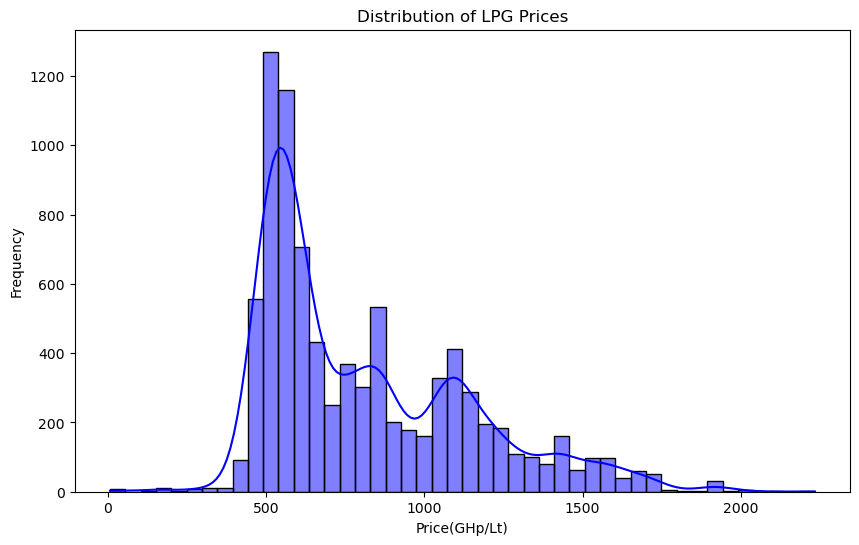

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['LPG (GHp/Kg)'], kde=True, color='blue')
plt.title('Distribution of LPG Prices')
plt.xlabel('Price(GHp/Lt)')
plt.ylabel('Frequency')
plt.show()

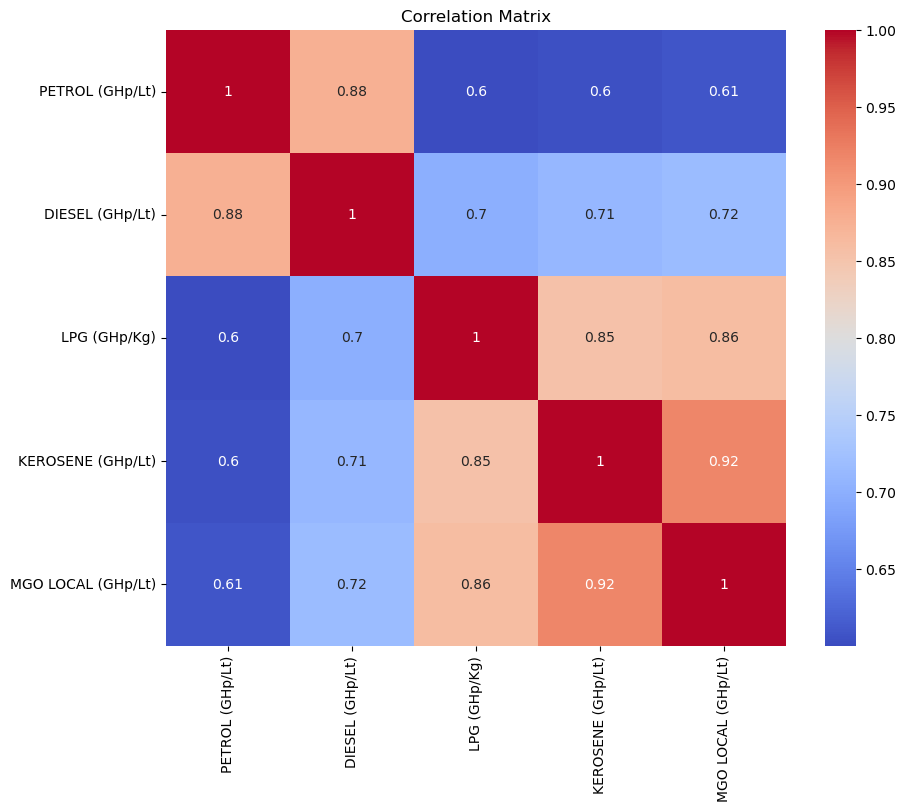

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
corr_matrix = df.corr()

# Identify the most relevant features for predicting 'LPG Prices'
relevant_features = corr_matrix['LPG (GHp/Kg)'].sort_values(ascending=False)
print(relevant_features)

LPG (GHp/Kg)          1.000000
MGO LOCAL (GHp/Lt)    0.860091
KEROSENE (GHp/Lt)     0.853181
DIESEL (GHp/Lt)       0.699222
PETROL (GHp/Lt)       0.600099
Name: LPG (GHp/Kg), dtype: float64


In [10]:
X = df.drop('LPG (GHp/Kg)', axis=1)
y = df['LPG (GHp/Kg)']

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 12469.554046876538
R-squared: 0.8863797590531602


In [12]:
rf_model

RandomForestRegressor(random_state=42)

In [13]:
import joblib

In [14]:
joblib.dump(rf_model, 'random_forest_regressor_model_for_lpg.joblib')

['random_forest_regressor_model_for_lpg.joblib']

In [15]:
predictions = rf_model.predict(X_test)

In [16]:
#predicted lpg price
predictions

array([537.085495  , 438.57503333, 606.1076375 , ..., 832.86143333,
       500.460455  , 866.01242857])

In [17]:
#original lpg price
y_test

1176    608.65
2124    463.74
3785    645.92
1864    500.78
33      547.00
         ...  
279     501.00
3909    701.00
4949    835.00
2571    518.92
5165    853.78
Name: LPG (GHp/Kg), Length: 2574, dtype: float64

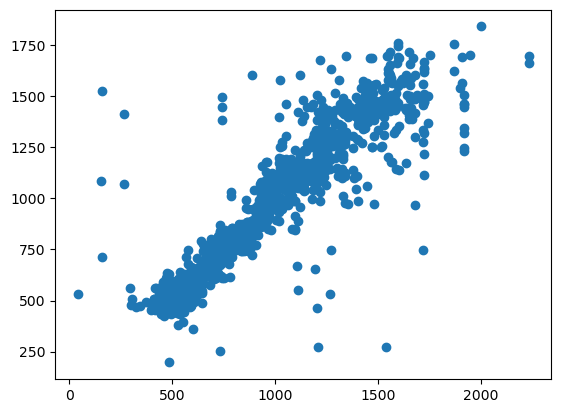

In [18]:
plt.scatter(y_test,predictions)